<a href="https://colab.research.google.com/github/johnotro/Library-management-system/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
pio.templates
%matplotlib inline

import plotly.express as px


In [ ]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
x = california_housing.data
y = california_housing.target

data = pd.DataFrame(x, columns=california_housing.feature_names)
data['PRICE'] = y
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
print(data.shape)

(20640, 9)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
data.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
PRICE,0


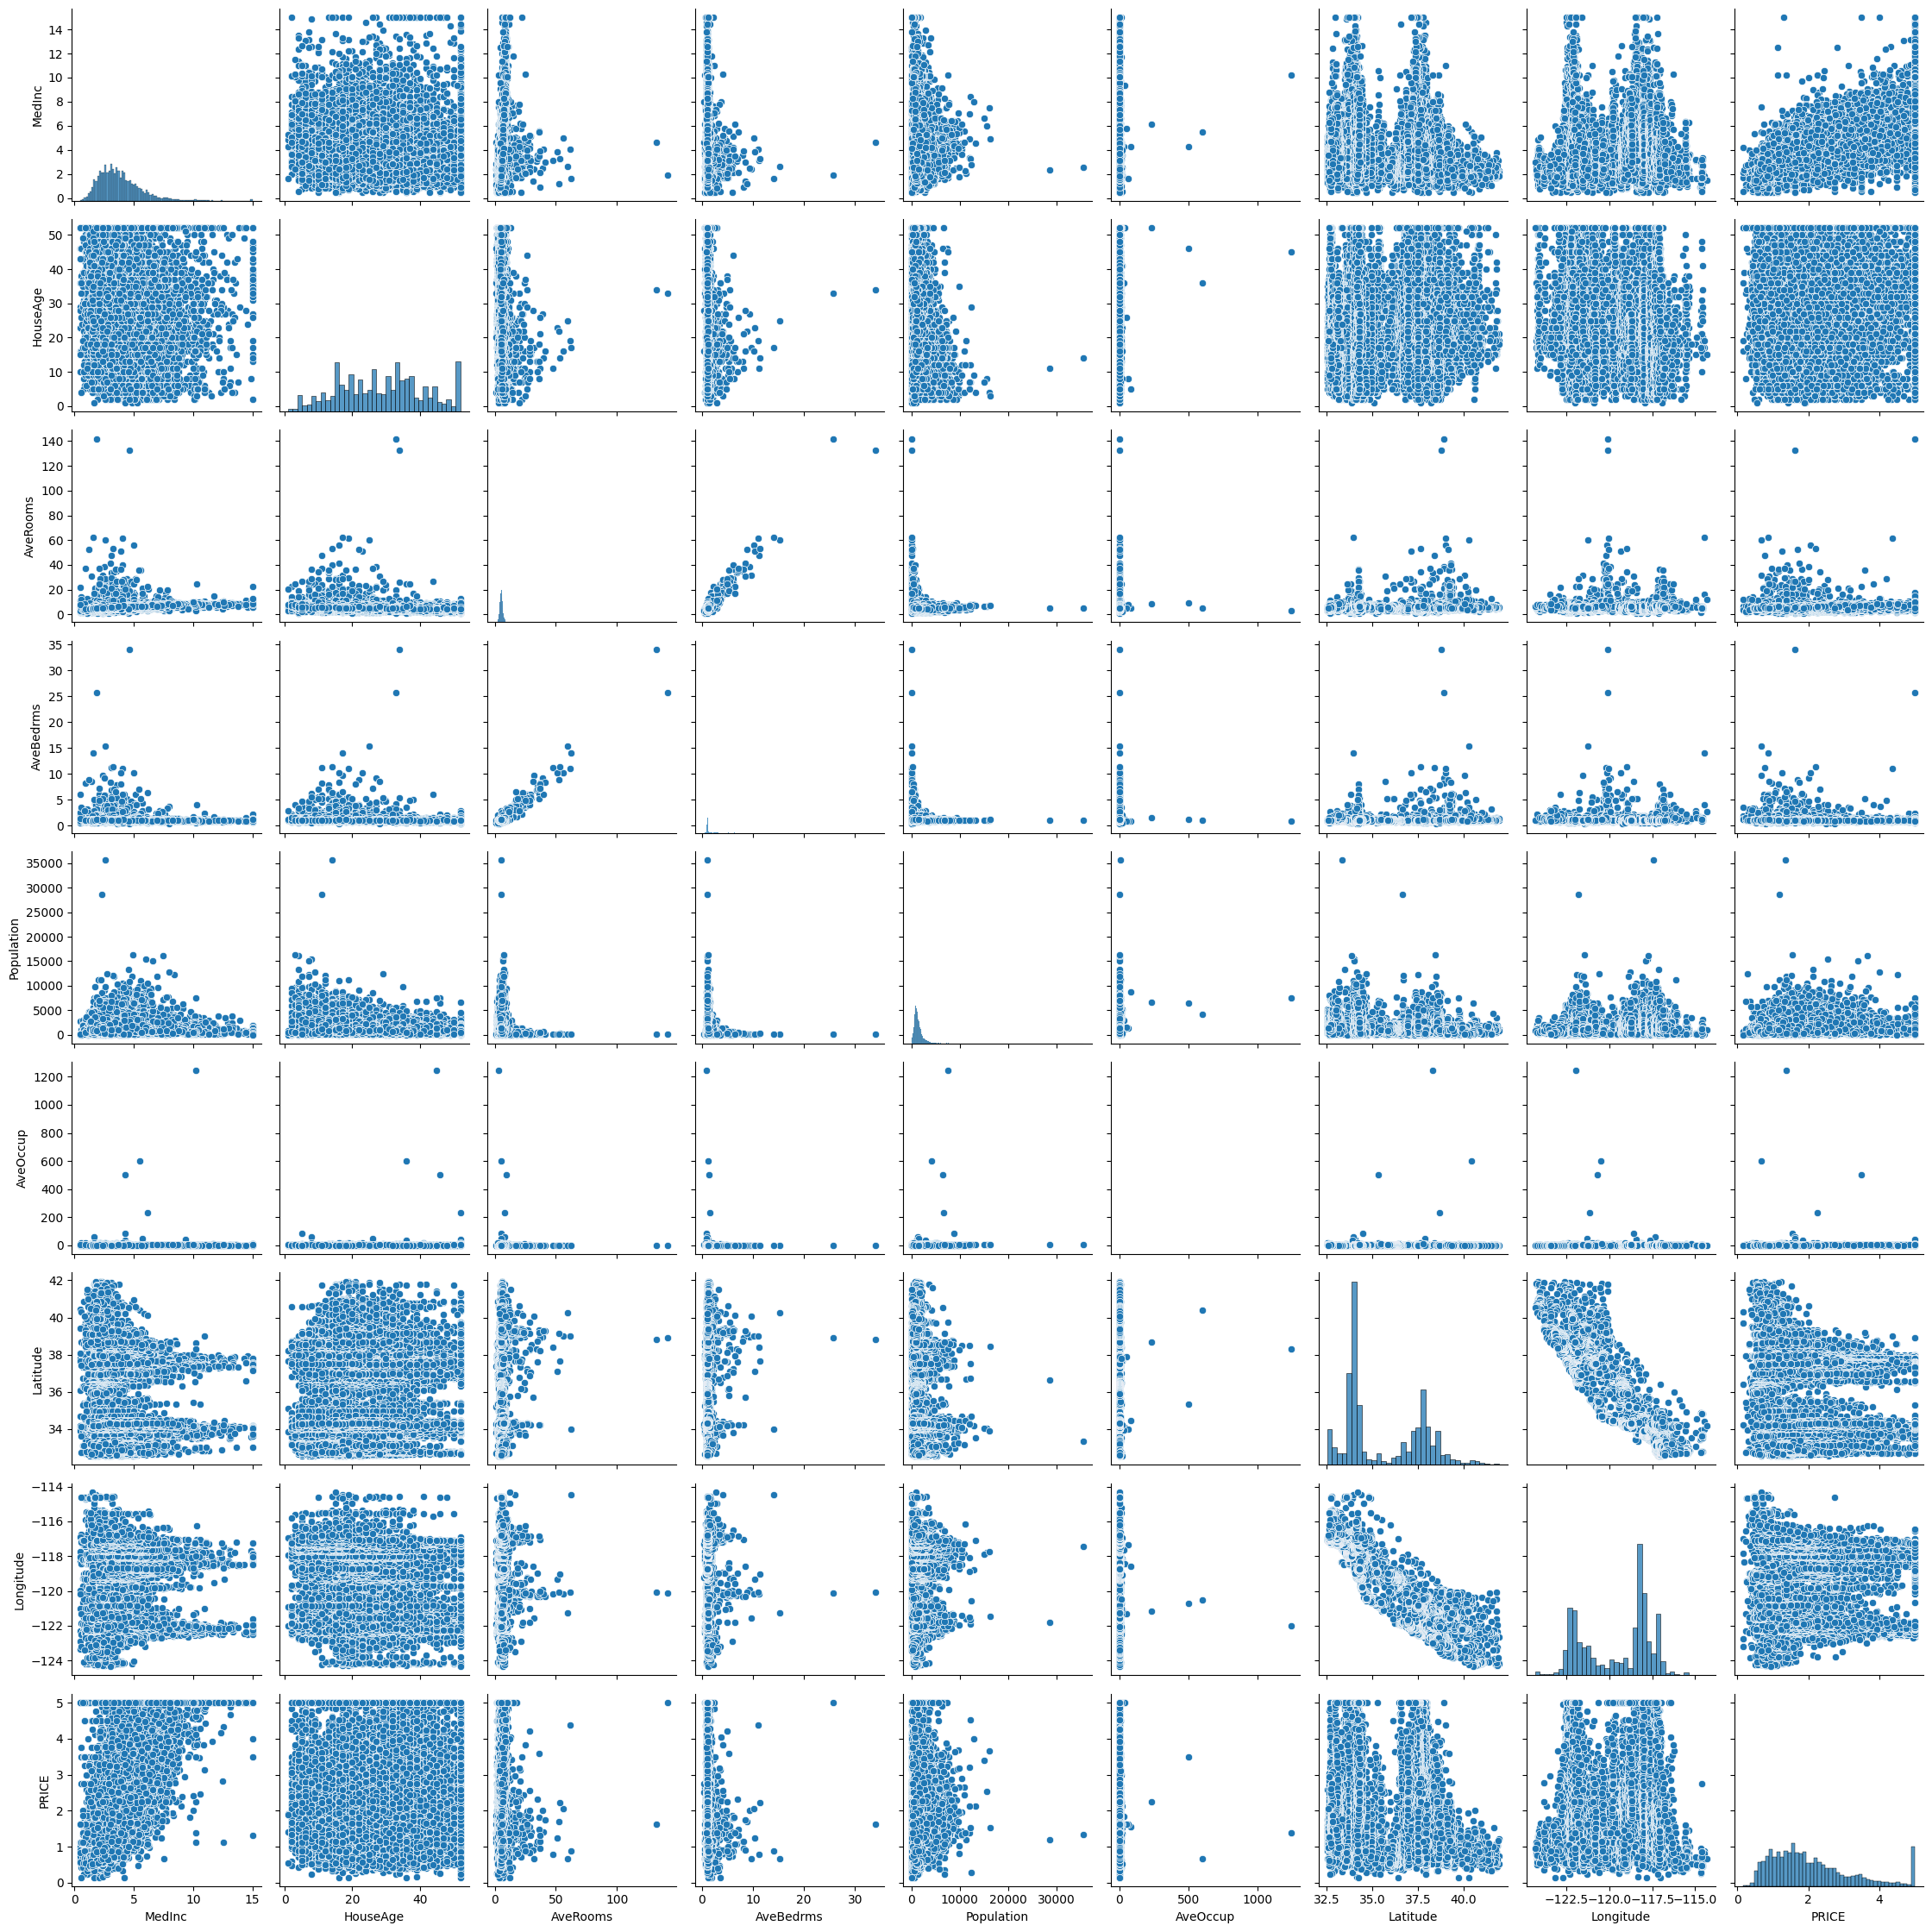

In [ ]:
sns.pairplot(data, height=2.5)
plt.tight_layout()

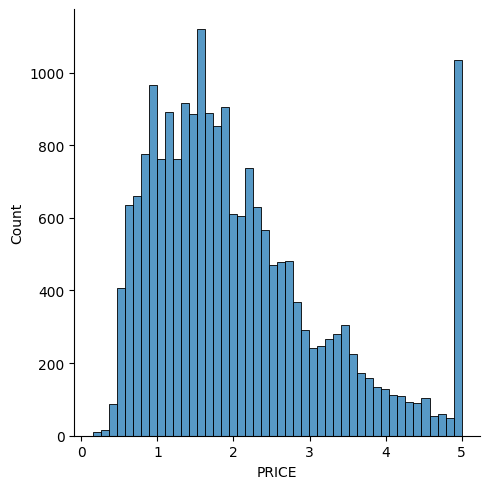

In [ ]:
sns.displot(data['PRICE'])

In [ ]:
print("skewness:%f" % data['PRICE'].skew())
print("kurtosis: %f" % data['PRICE'].kurt())

skewness:0.977763
kurtosis: 0.327870


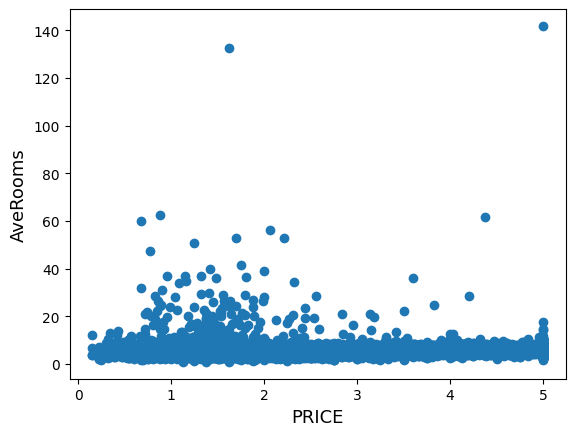

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = data['PRICE'], y = data['AveRooms'])
plt.ylabel('AveRooms', fontsize=13)
plt.xlabel('PRICE', fontsize=13)
plt.show()

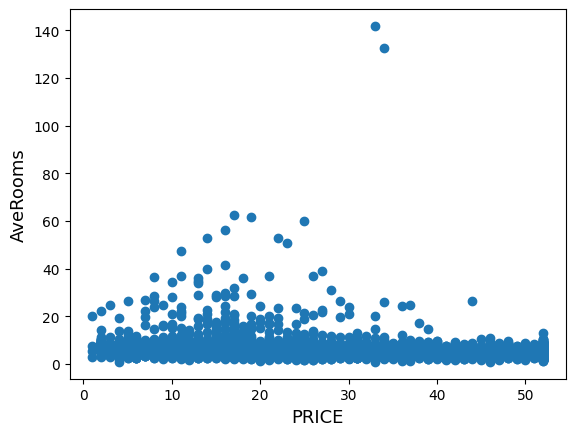

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = data['HouseAge'], y = data['AveRooms'])
plt.ylabel('AveRooms', fontsize=13)
plt.xlabel('PRICE', fontsize=13)
plt.show()

<ipython-input-22-2b98de30f165>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PRICE'], fit=norm);



 mu = 2.07 and sigma = 1.15



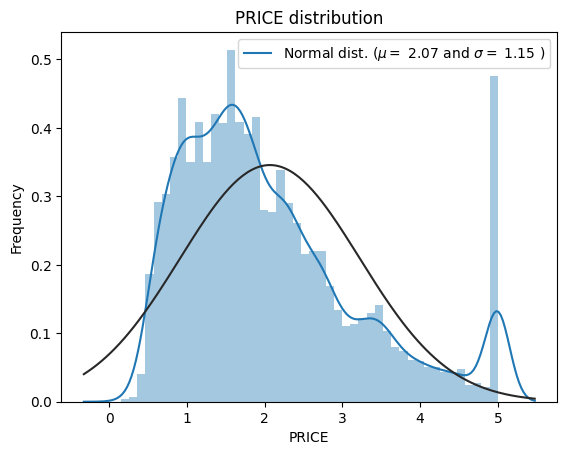

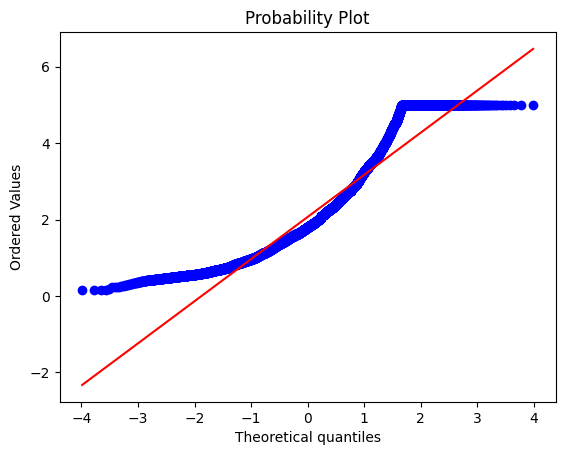

In [ ]:
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(data['PRICE'], fit=norm);
(mu, sigma) = norm.fit(data['PRICE'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('PRICE distribution')

fig = plt.figure()
res = stats.probplot(data['PRICE'], plot=plt)
plt.show()

<ipython-input-24-03649021d340>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['saleprce'], fit=norm);



 mu = 0.57 and sigma = 0.57



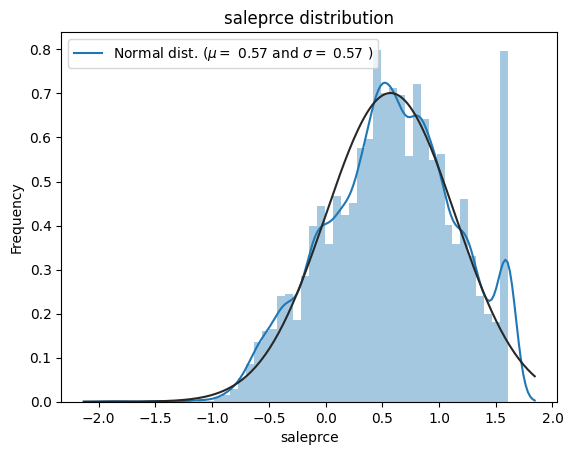

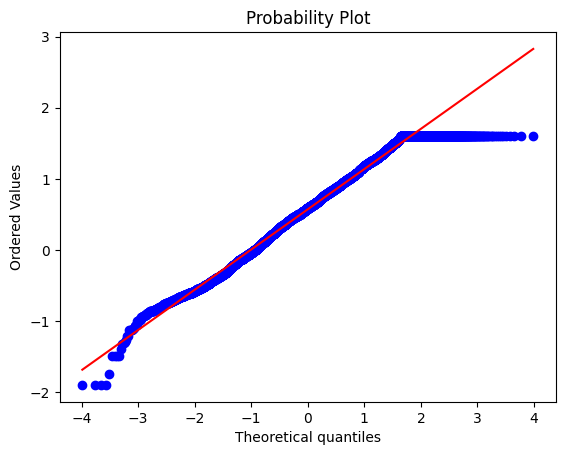

In [ ]:
data["saleprce"]= np.log(data["PRICE"])

sns.distplot(data['saleprce'], fit=norm);

(mu, sigma) = norm.fit(data['saleprce'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('saleprce distribution')

fig = plt.figure()
res = stats.probplot(data['saleprce'], plot=plt)
plt.show()



data correlation

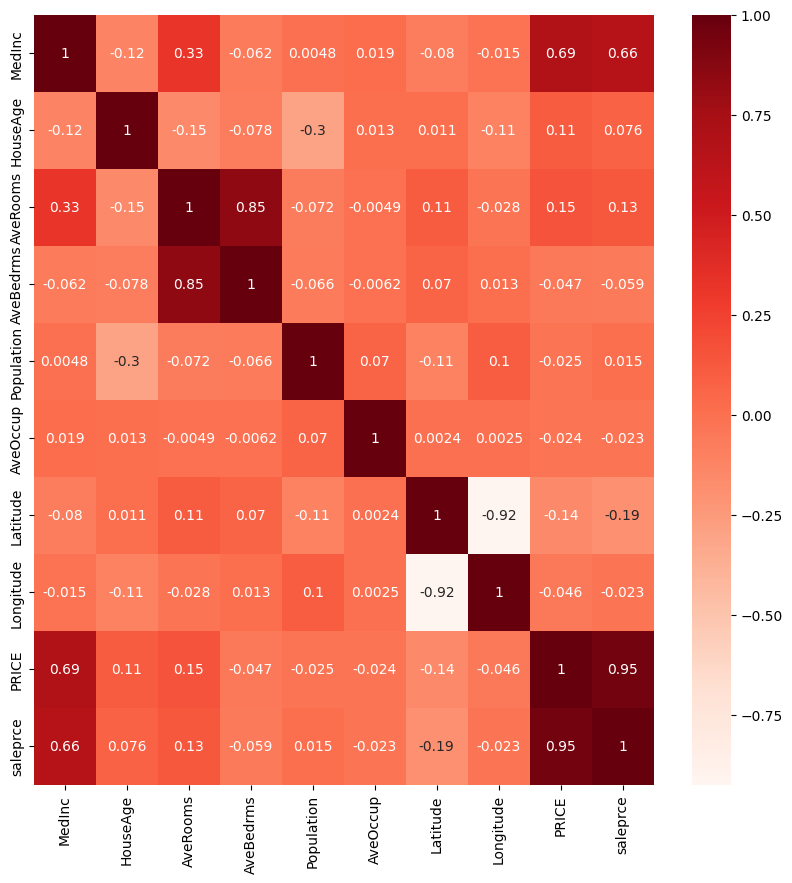

In [ ]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
Cor_target = abs(cor["saleprce"])
relevant_features = Cor_target[Cor_target>0.5]

names = [index for index, value in relevant_features.items()]
names.remove('saleprce')

print(names)
print(len(names))

['MedInc', 'PRICE']
2


model buildig

In [31]:
from sklearn.model_selection import train_test_split
x = data.drop(['PRICE', 'saleprce'], axis=1)
y = data.saleprce

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [36]:
prediction = lr.predict(x_test)
print("actual value of the house:-", y_test.values[0])
print("model predicted value :-",prediction)

actual value of the house:- -0.7402387880937958
model predicted value :- [-0.11051038  0.4713235   0.83984154 ...  1.70646778  0.0853328
  0.58162326]


In [39]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, prediction)
print("mse:", mse)

rmse = np.sqrt(mse)
print(rmse)

mse: 0.13179179578432593
0.3630313977940833
